In [87]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [88]:
data = pd.read_csv(r"C:\Users\Dell\Desktop\ZINDUA\Machine_Learning\week1_project\chip_dataset.csv")

In [89]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4945 entries, 0 to 4944
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Product                4945 non-null   object 
 1   Type                   4945 non-null   object 
 2   Release Date           4746 non-null   object 
 3   Process Size (nm)      4945 non-null   object 
 4   TDP (W)                4508 non-null   object 
 5   Die Size (mm^2)        4593 non-null   object 
 6   Transistors (million)  4390 non-null   object 
 7   Freq (GHz)             4508 non-null   float64
 8   Foundry                4330 non-null   object 
 9   Vendor                 4945 non-null   object 
 10  FP16 GFLOPS            800 non-null    float64
 11  FP32 GFLOPS            1685 non-null   float64
 12  FP64 GFLOPS            1278 non-null   float64
dtypes: float64(4), object(9)
memory usage: 502.4+ KB


In [90]:
data.head()

,Product,Type,Release Date,Process Size (nm),TDP (W),Die Size (mm^2),Transistors (million),Freq (GHz),Foundry,Vendor,FP16 GFLOPS,FP32 GFLOPS,FP64 GFLOPS
0,AMD Athlon 1000,CPU,6/5/00,180,54,120,37,1000.0,NaN,AMD,NaN,NaN,NaN
1,AMD Athlon 1000,CPU,10/31/00,180,54,120,37,1000.0,NaN,AMD,NaN,NaN,NaN
2,AMD Athlon 1100,CPU,8/14/00,180,60,120,37,1100.0,NaN,AMD,NaN,NaN,NaN
3,AMD Athlon 1133,CPU,10/31/00,180,63,120,37,1133.0,NaN,AMD,NaN,NaN,NaN
4,AMD Athlon 1200,CPU,10/31/00,180,66,120,37,1200.0,NaN,AMD,NaN,NaN,NaN


## Transform temporal data to their corrrect format (date time)

In [91]:
data["Release Date"] = pd.to_datetime(data["Release Date"], format="%m/%d/%y")

## Explore the missingness in the dataset for categorical and numerical data

In [92]:
categorical_cols = ["Product", "Type","Process Size (nm)","TDP (W)","Die Size (mm^2)","Transistors (million)","Foundry","Vendor"]  # List of categorical columns
for col in categorical_cols:
    missing_values = data[col].isnull().sum()
    print(f"Missing values in {col}: {missing_values}")

Missing values in Product: 0
Missing values in Type: 0
Missing values in Process Size (nm): 0
Missing values in TDP (W): 437
Missing values in Die Size (mm^2): 352
Missing values in Transistors (million): 555
Missing values in Foundry: 615
Missing values in Vendor: 0


In [93]:
numerical_cols = ["Freq (GHz)", "FP16 GFLOPS","FP32 GFLOPS","FP64 GFLOPS"]  # List of numerical columns
for col in numerical_cols:
    missing_values = data[col].isnull().sum()
    print(f"Missing values in {col}: {missing_values}")

Missing values in Freq (GHz): 437
Missing values in FP16 GFLOPS: 4145
Missing values in FP32 GFLOPS: 3260
Missing values in FP64 GFLOPS: 3667


## How i was testing my data

In [94]:
data["Product"].nunique()

4567

In [95]:
data["Type"].unique()

array(['CPU', 'GPU'], dtype=object)

In [96]:
data["Process Size (nm)"].unique()

array(['180', '90', '130', '65', '45', '32', '40', '22', '28', '14', '12',
       '10', '7', '16', '6', '5', '4', '250', '150', '110', '0', '80',
       '55', '14+', '14++', '14+++', '20', '10+', '8'], dtype=object)

In [97]:
data["TDP (W)"].unique()

array(['54', '60', '63', '66', '38', '40', '43', '45', '47', '50', '52',
       '30', '55', '58', '29', '31', '25', '68', '70', '72', '51', '59',
       '89', '67', '49', '64', '53', '62', '61', '69', '110', '84', '27',
       '36', '8', '9', '65', '74', '73', '92', '21', '26', '32', '35',
       '10', '79', '77', '82', '85', '76', '24', '97', '104', '88', '115',
       '103', '135', '83', '95', '22', '130', '125', '119', '120', '75',
       '15', '80', '150', '3', '19', '44', '105', '5', '4', '1', '2',
       '17', '7', '140', '13', '6', '28', '300', '18', '100', '225', '37',
       '12', '270', '245', '90', '160', '165', '145', '215', '230', '260',
       '170', '180', '112', '91', '200', '250', '320', '205', '255', '71',
       '155', '280', '127', '350', '400', '240', '380', '185', '235',
       '195', '190', '265', '220', '210', '290', '360', '175', '340',
       '330', '385', '46', nan, 'unknown', '23', '11', '57', '33', '48',
       '81', '101', '111', '41', '42', '113', '203', 

In [98]:
data["Die Size (mm^2)"].unique()

array(['120', '129', '217', '80', '106', '375', '84', '193', '83', '115',
       '199', '156', '150', '101', '144', '146', '109', '56', '131', nan,
       '269', '100', '237', '112', '135', '125', '90', '206', '2x 81',
       '213', '235', '126', '220', '103', '111', '143', '2x 143', '435',
       '77', '230', '103.1', '183', '101.3', '285', '66', '2x 107',
       '25.96', '26', '76', '82', '107', '81', '2x 82', '263', '63',
       '117', '169', '258', '96', '296', '346', '87', '65', '684', '239',
       '228', '75', '315', '316', '149', '216', '246', '2x 315', '94',
       '118', '133', '160', '350', '177', '257', '264', '341', '245',
       '50', '356', '622', '182', '122', '46', '250', '124', '171', '456',
       '192', '2x 213', '93', '123', '154', '484', '209.8', '210',
       '4x 213', '70.52', '180.3', '148', '74', '2x 74', '4x 74', '180',
       '8x 74', '177.5', '195', '308', '190', '146.1', '215', '276',
       '8x 81', '4x 72', '8x 72', '12x 72', '71', '208', '2x 71', '4x 81

In [99]:
data["Transistors (million)"].unique()

array(['37', nan, '42', '44', '28', '140', '69', '105', '233', '154',
       '63', '55', '125', '16', '106', '178', '77', '286', '114', '155',
       '151', '169', '230', '376', '200', '227', '81', '167', '291',
       '293', '582', '1328', '122', '450', '176', '820', '463', '47',
       '228', '420', '410', '274', '456', '731', '94', '300', '758',
       '234', '123', '774', '904', '2300', '382', '1170', '384', '1178',
       '1200', '2400', '504', '624', '1160', '2270', '1303', '1480',
       '1400', '5000', '960', '1300', '1860', '2800', '2411', '2600',
       '5690', '3200', '1750', '5960', '3100', '3400', '7200', '8000',
       '4800', '9600', '4950', '19200', '3800', '4940', '7600', '15200',
       '9800', '4150', '8300', '30400', '4050', '10700', '10600', '33200',
       '26280', '52560', '78840', '6570', '8850', '13140', '16600',
       '8875', '17750', '35500', '90160', '135240', '71000', '20900',
       '25000', '17840', '14', '30', 'unknown', '51', '10', '25', '20',
       '

In [100]:
data["Foundry"].unique()

array([nan, 'Intel', 'TSMC', 'Fujitsu', 'GlobalFoundries', 'IBM', 'NEC',
       'UMC', 'Sony', 'Samsung', 'Renesas'], dtype=object)

In [101]:
data["Foundry"].nunique()

10

In [102]:
data["Vendor"].unique()

array(['AMD', 'Intel', 'VIA', '3dfx', 'ATI', 'Matrox', 'NVIDIA', 'Sony',
       'XGI'], dtype=object)

In [103]:
data["Freq (GHz)"].nunique()

540

In [104]:
data["Freq (GHz)"].unique()

array([1000., 1100., 1133., 1200.,  600.,  650.,  700.,  750.,  800.,
        850.,  900.,  950.,  667., 1400., 1500.,  866.,  933., 1300.,
       1333., 2000., 2200., 2400., 1467., 1533., 1600., 1733., 1800.,
       1583., 1667., 1750., 1833., 1700., 1900., 3060., 1266., 2133.,
       2083., 2167., 2250., 2100., 2261., 2527., 2600., 2660., 2793.,
       2394., 2790., 1917., 2333., 1862., 1867., 2300., 2700., 2800.,
       2667., 3067., 3200., 3000., 2500., 3066., 1992., 2533., 2530.,
       2930., 3334., 3600., 2933., 3400., 3800., 3466., 2260., 2833.,
       1866., 2166., 2666., 1066., 3166., 3333., 3500., 3100., 1860.,
       1073., 1067., 1334., 2267., 2534., 2900., 2266., 3300., 1834.,
       1877., 1650., 3900., 4000., 1053., 1250., 1910., 1463., 1580.,
       2170., 3700., 1238., 2160., 1830., 4200., 4300., 4100., 3050.,
       4050., 3250., 3850., 2750., 2450., 4700., 4500., 3350., 2050.,
       2550., 2650., 3550.,  166.,   nan,  143.,  120.,  162.,  148.,
        133.,  125.,

In [105]:
data["FP16 GFLOPS"]

0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
         ...   
4940     6021.0
4941    35480.0
4942    44100.0
4943    52220.0
4944    71810.0
Name: FP16 GFLOPS, Length: 4945, dtype: float64

In [106]:
data["FP32 GFLOPS"]

0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
         ...   
4940     6021.0
4941    35480.0
4942    44100.0
4943    52220.0
4944    71810.0
Name: FP32 GFLOPS, Length: 4945, dtype: float64

In [107]:
data["FP64 GFLOPS"]

0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
         ...   
4940      94.08
4941     554.40
4942     689.00
4943     816.00
4944    1122.00
Name: FP64 GFLOPS, Length: 4945, dtype: float64

## Develop a strategy to deal with the missing values, i.e deletion, imputation by mean or mode etc, whilst providing rationale for your approach. And Drop non-consequntial fields

In [108]:
data["Process Size (nm)"] = data["Process Size (nm)"].str.replace("[^0-9]", " ", regex=True)  # Remove non-numeric characters puts a space
data["Process Size (nm)"] = pd.to_numeric(data["Process Size (nm)"], errors="coerce")         # Remove non-numeric values and replace them with NaN
data["Process Size (nm)"] = data["Process Size (nm)"].fillna(0)                               #replace nan with 0            
data["Process Size (nm)"] = data["Process Size (nm)"].astype(int)                             #converting to int 

In [109]:
data["TDP (W)"] = data["TDP (W)"].replace("unknown",np.nan) #convert the unknown to nan       
data["TDP (W)"] = data["TDP (W)"].fillna(0)  
data["TDP (W)"] = data["TDP (W)"].astype(int)  

In [110]:
data["Die Size (mm^2)"] = data["Die Size (mm^2)"].replace("unknown",np.nan)
data["Die Size (mm^2)"] = pd.to_numeric(data["Die Size (mm^2)"], errors="coerce")   #i lost some values
data["Die Size (mm^2)"] = data["Die Size (mm^2)"].fillna(0)                                     
data["Die Size (mm^2)"] = data["Die Size (mm^2)"].astype(int)   

In [111]:
data["Transistors (million)"] = data["Transistors (million)"].replace("unknown",np.nan)
data["Transistors (million)"] = pd.to_numeric(data["Transistors (million)"], errors="coerce") # Remove non-numeric values and replace them with NaN
data["Transistors (million)"] = data["Transistors (million)"].fillna(0)                                     
data["Transistors (million)"] = data["Transistors (million)"].astype(int)   

In [112]:
data["Foundry"] = data["Foundry"].fillna("UnKnown")

## Missing values in Freq (GHz)

In [113]:
freq_distribution = data["Freq (GHz)"].value_counts(normalize=True) #Calculate the frequency distribution of existing data
#Generate random frequencies based on this distribution
random_freq = np.random.choice(freq_distribution.index, size=data["Freq (GHz)"].isnull().sum(), p=freq_distribution.values)
data.loc[data["Freq (GHz)"].isnull(), "Freq (GHz)"] = random_freq  #Filling in the missing values with random frequencies

### testing freq

In [114]:
n = len(random_freq)
print(n)

437


In [115]:
m = len(freq_distribution)
print(m)

540


In [116]:
freq_distribution

Freq (GHz)
2000.0    0.034383
2400.0    0.029947
300.0     0.029503
2200.0    0.026398
2800.0    0.025067
            ...   
834.0     0.000222
1862.0    0.000222
1071.0    0.000222
1176.0    0.000222
2295.0    0.000222
Name: proportion, Length: 540, dtype: float64

In [117]:
random_freq

array([1329., 3200.,  918.,  488., 2100.,  925., 3400., 3500.,  400.,
       4100.,  852.,  500.,  450.,  500.,  450.,  965., 3500., 2600.,
       1500., 3600., 1200., 2200., 2100.,  300., 3100., 3000., 1600.,
       2200.,  800., 3200.,  550.,  970.,  947., 2600.,  400.,  725.,
        400.,  175.,  500.,  300.,  825.,  200., 1600.,  450.,  650.,
        475., 2800., 2260., 1900., 3600.,  400.,  350.,  200.,  948.,
       2667.,  900.,  735., 2750., 2400., 3100.,  750., 2800.,  300.,
       2200.,  640.,  947.,  325., 2200.,  700.,  600.,  380.,  736.,
       1410.,  300., 1100., 3100., 3400., 2600., 1082., 1030.,  450.,
       3700.,  200., 1000.,  125.,  600.,  650.,  719.,  602.,  275.,
       3100.,  900., 2333., 2900., 2800., 3300.,  575.,  738., 2300.,
        425., 2800., 1000.,  200., 1455., 1000., 2700.,  667., 2400.,
        300., 2000., 1917.,  954.,  715.,  625.,  550., 2000., 2800.,
       1230.,  600., 3060., 2500., 1900.,  900.,  300.,  550.,  350.,
        125.,  823.,

### Missing values in FP16 GFLOPS

In [118]:
data["FP16 GFLOPS"] = data["FP16 GFLOPS"].fillna(0)  

### Missing values in FP32 GFLOPS

In [119]:
data["FP32 GFLOPS"] = data["FP32 GFLOPS"].fillna(0)

### Missing values in FP64 GFLOPS

In [120]:
data["FP64 GFLOPS"] = data["FP64 GFLOPS"].fillna(0)

## Perfom a full EDA and demonstrate the validity of the following assumptions

1. Moore's Law still holds, especially in GPUs.

In [122]:
gpu = data[data["Type"] == "GPU"]

In [139]:
cpu = data[data["Type"] == "CPU"]

In [140]:
#gpu.head()

In [125]:
gpu_sort = gpu.sort_values(by = "Release Date")

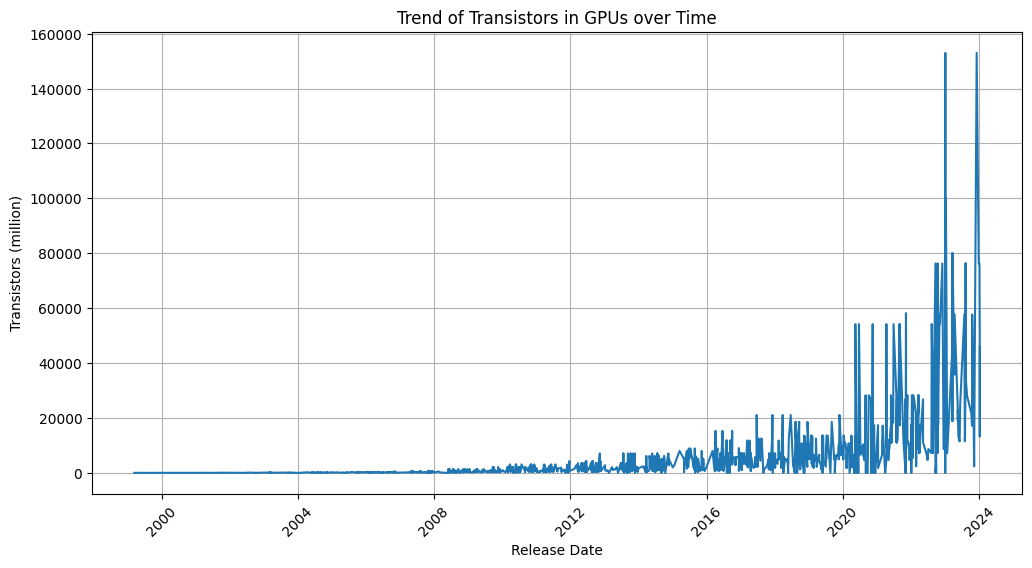

In [156]:
plt.figure(figsize=(12, 6))
plt.plot(gpu_sort["Release Date"], gpu_sort["Transistors (million)"])
plt.xlabel("Release Date")
plt.ylabel("Transistors (million)")
plt.title("Trend of Transistors in GPUs over Time")
plt.xticks(rotation=45)
plt.grid(True)

In [138]:
#since there is an increase in transinstor over time then moore's law holds

2. Dannard Scaling is still valid in general.

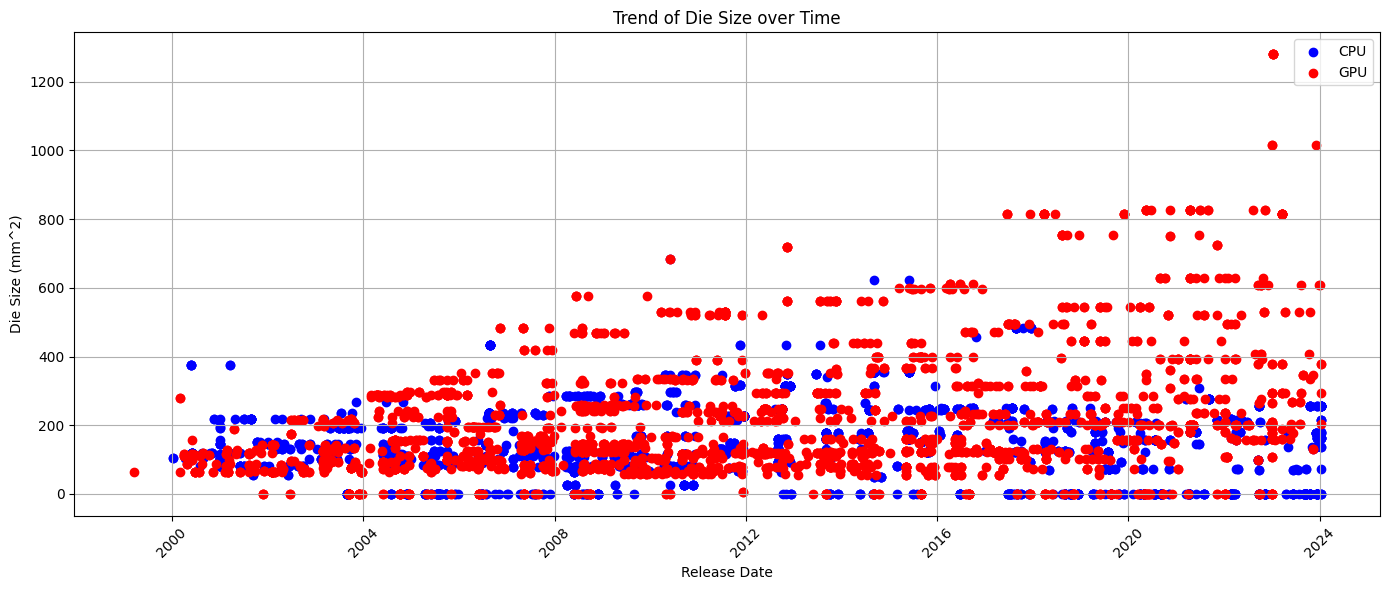

In [154]:
plt.figure(figsize=(14, 6))

# Plot 1: Trend of Die Size over time
plt.scatter(cpu["Release Date"], cpu["Die Size (mm^2)"], label="CPU", color="blue")
plt.scatter(gpu["Release Date"], gpu["Die Size (mm^2)"], label="GPU", color="red")
plt.xlabel("Release Date")
plt.ylabel("Die Size (mm^2)")
plt.title("Trend of Die Size over Time")
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)

plt.tight_layout()
plt.show()


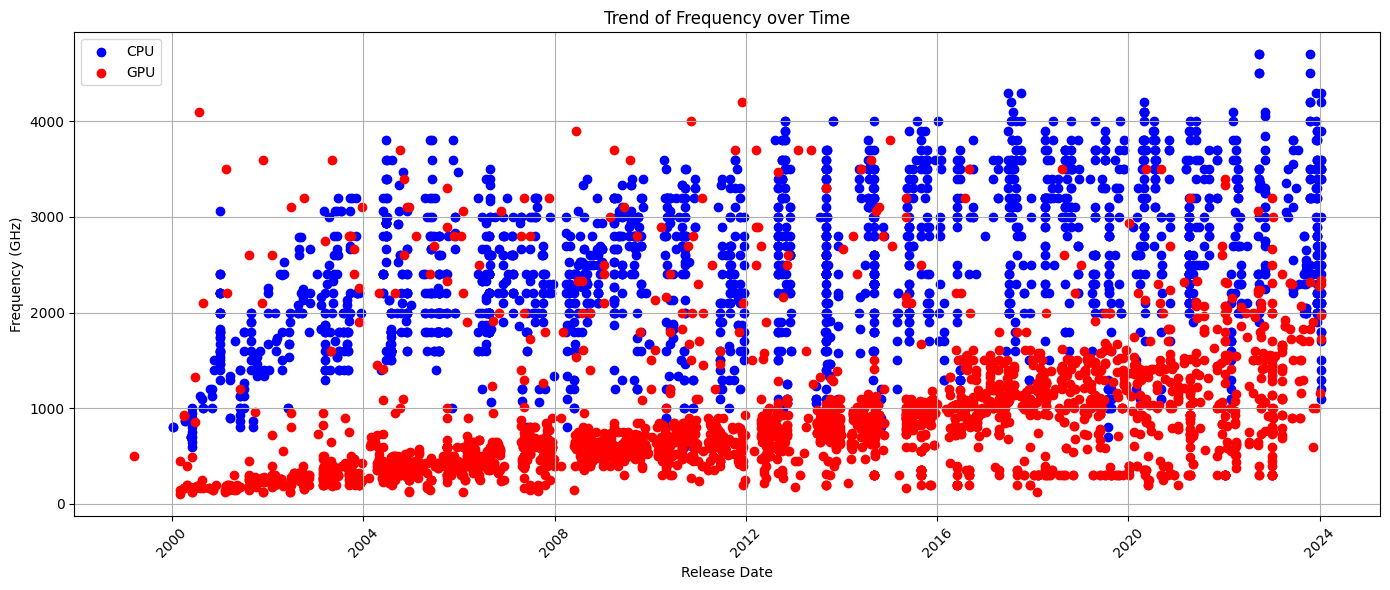

In [152]:
# Plot 2: Trend of Frequency over time
plt.figure(figsize=(14, 6))
plt.scatter(cpu["Release Date"], cpu["Freq (GHz)"], label="CPU", color="blue")
plt.scatter(gpu["Release Date"], gpu["Freq (GHz)"], label="GPU", color="red")
plt.xlabel("Release Date")
plt.ylabel("Frequency (GHz)")
plt.title("Trend of Frequency over Time")
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)

plt.tight_layout()
plt.show()

CPUs have higher frequencies, but GPUs are catching up.

GPU performance doubles every 1.5 years.

GPU performance improvement is a joint effect of smaller transistors, larger die size, and higher frequency.

## Calculate and visualized the correlation among the features

In [42]:
numeric_data = data[["Process Size (nm)","TDP (W)","Die Size (mm^2)","Transistors (million)","Freq (GHz)",
                     "FP16 GFLOPS","FP32 GFLOPS","FP64 GFLOPS" ]]
correlation_matrix = numeric_data.corr()

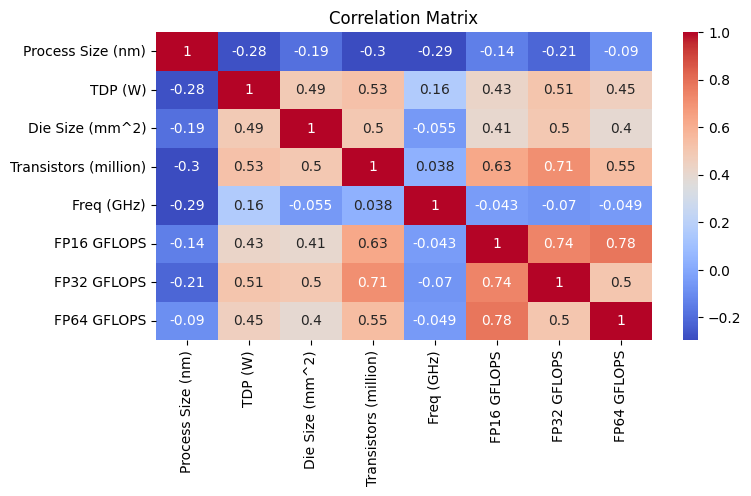

In [48]:
plt.figure(figsize=(8, 4))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

## Perfom the correct encoding for your data, in readiness for modelling.

In [70]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder


In [162]:
# Step 1: Handle Missing Values
# Identify columns with missing values
columns_with_missing = data.columns[data.isnull().any()]

In [163]:
columns_with_missing

Index(['Release Date'], dtype='object')